# Website Link

# https://women-clothing-review.herokuapp.com/

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning and Feature engineering

In [2]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
df.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df.drop(df[df['Review Text'].isna()].index,inplace=True) #drop where there are no text

In [6]:
blanks = []  # start with an empty list

for i,lb,rv in df[['Review Text','Title']].itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)

In [7]:
blanks #there are no blanks or space instead of NaN

[]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 22641 non-null int64
Clothing ID                22641 non-null int64
Age                        22641 non-null int64
Title                      19675 non-null object
Review Text                22641 non-null object
Rating                     22641 non-null int64
Recommended IND            22641 non-null int64
Positive Feedback Count    22641 non-null int64
Division Name              22628 non-null object
Department Name            22628 non-null object
Class Name                 22628 non-null object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [9]:
#df[df['Rating']==3]

In [10]:
df['Title']=df['Title'].apply(lambda x:" " if pd.isnull(x) else x) #replace null value with a space

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 22641 non-null int64
Clothing ID                22641 non-null int64
Age                        22641 non-null int64
Title                      22641 non-null object
Review Text                22641 non-null object
Rating                     22641 non-null int64
Recommended IND            22641 non-null int64
Positive Feedback Count    22641 non-null int64
Division Name              22628 non-null object
Department Name            22628 non-null object
Class Name                 22628 non-null object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [12]:
#df[df['Division Name'].isna()]

In [13]:
df['Division Name'].fillna(df['Division Name'].mode()[0],inplace=True) # replace nan with most common value that occur

In [14]:
df['Department Name'].fillna(df['Department Name'].mode()[0],inplace=True)

In [15]:
df['Class Name'].fillna(df['Class Name'].mode()[0],inplace=True)

In [16]:
df.info() # data types are fine plus there are no null values left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 22641 non-null int64
Clothing ID                22641 non-null int64
Age                        22641 non-null int64
Title                      22641 non-null object
Review Text                22641 non-null object
Rating                     22641 non-null int64
Recommended IND            22641 non-null int64
Positive Feedback Count    22641 non-null int64
Division Name              22641 non-null object
Department Name            22641 non-null object
Class Name                 22641 non-null object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [17]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [18]:
df['Title-Review Text']=df[['Title', 'Review Text']].apply(lambda x: ' '.join(x), axis=1)

In [19]:
df.head(6)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title-Review Text
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and co...
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happe...
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...


In [20]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [21]:
df['Review']=df['Rating'].apply(lambda x: "positive" if x>3 else("negative" if x<3 else("neutral" if x==3 else x)))

In [22]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title-Review Text,Review
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and co...,positive
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happe...,positive
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,neutral
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,positive


In [23]:
df=df.sort_values("Clothing ID")
df.reset_index(drop=True,inplace=True)

In [24]:
df.iloc[18111:,:]['Clothing ID'].unique()

array([1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091,
       1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102,
       1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113,
       1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124,
       1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135,
       1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146,
       1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157,
       1158, 1159, 1160, 1161, 1162, 1163, 1165, 1166, 1167, 1168, 1169,
       1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180,
       1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191,
       1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1202, 1203,
       1204, 1205], dtype=int64)

# Eda

In [25]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [26]:
#import nltk
#nltk.download("stopwords")
#nltk.download('punkt')

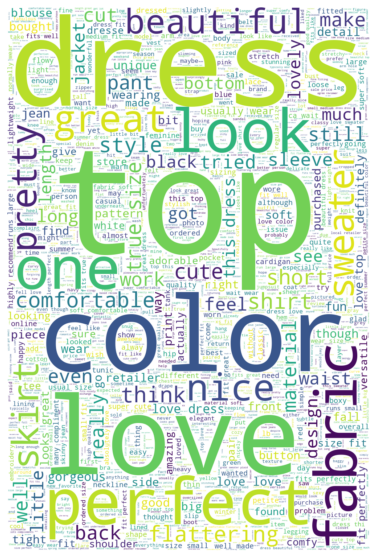

In [27]:
"""
Reference from Ken Jee : https://github.com/PlayingNumbers/ds_salary_proj
"""
words = " ".join(df['Title-Review Text'][df['Review']=="positive"])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)


text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1000, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

The words like love, top, perfect, great, etc are used for positive reviews 

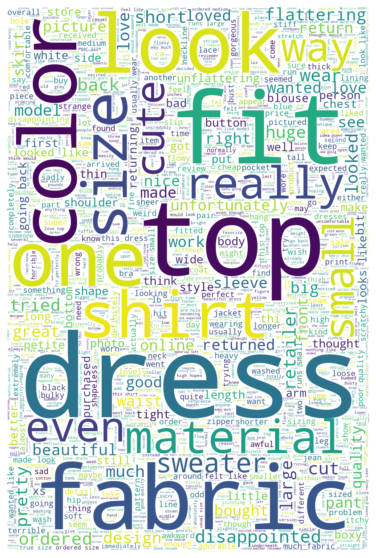

In [28]:
words = " ".join(df['Title-Review Text'][df['Review']=="negative"])

words_filtered = punctuation_stop(words)


text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1000, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

Here we can see that there are word which look like complaint like fitting, material, look, size, etc are used

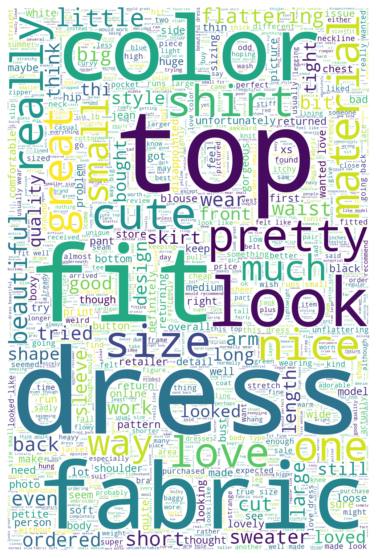

In [29]:
words = " ".join(df['Title-Review Text'][df['Review']=="neutral"])

words_filtered = punctuation_stop(words)


text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1000, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

This look like it has both complain as well as compliments

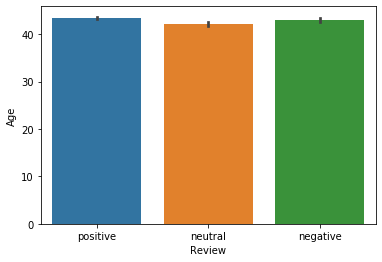

In [28]:
sns.barplot(x="Review",y="Age",data=df)

looks like people of every age has reviewd equally at an average

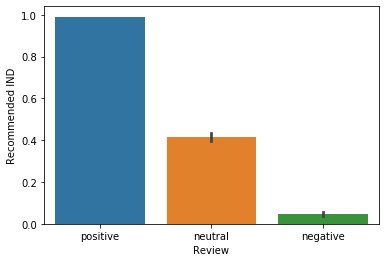

In [30]:
sns.barplot(x="Review",y="Recommended IND",data=df)

as we know that when the review are positive tend to recommend more then neutral then negative

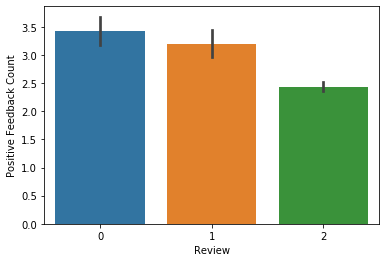

In [69]:
sns.barplot(x="Review",y="Positive Feedback Count",data=df)

we can see that positive feedback count vary slightly

# Data Preprocessing

In [30]:
df.reset_index(drop=True,inplace=True)

In [31]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df.loc[i,'Title-Review Text'])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [32]:
df['Title-Review Text']=corpus

In [33]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Title-Review Text', 'Review'],
      dtype='object')

In [34]:
df['Review']=df['Review'].apply(lambda x:0 if x=="negative" else(2 if x=='positive' else(1 if x=='neutral' else x)))

In [35]:
#df=df.sort_values("Clothing ID")
#df.reset_index(drop=True,inplace=True)

In [36]:
words=df['Title-Review Text']
y=df['Review']

In [37]:
#words

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=3000,ngram_range=(1,3))
words=tfidf_v.fit_transform(words).toarray()

In [40]:
X_train=words[:18111]
X_test=words[18111:]
y_train=y[:18111].values
y_test=y[18111:].values

In [41]:
#pd.DataFrame(words).to_csv("words.csv")

# ML Algorithms

## Gaussian Naive bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred=classifier.predict(X_test)

In [192]:
from sklearn.metrics import classification_report
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.25      0.59      0.35       500
           1       0.19      0.33      0.24       609
           2       0.90      0.60      0.72      3421

    accuracy                           0.56      4530
   macro avg       0.45      0.51      0.44      4530
weighted avg       0.73      0.56      0.62      4530



## Multinominal Naive bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [36]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.80      0.32      0.46       499
           1       0.44      0.15      0.23       607
           2       0.82      0.99      0.90      3424

    accuracy                           0.80      4530
   macro avg       0.69      0.49      0.53      4530
weighted avg       0.77      0.80      0.76      4530



## Logistics Regression

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight="balanced")
classifier.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight='balanced')

In [38]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.49      0.60      0.54       499
           1       0.34      0.49      0.40       607
           2       0.95      0.84      0.89      3424

    accuracy                           0.77      4530
   macro avg       0.59      0.64      0.61      4530
weighted avg       0.82      0.77      0.79      4530



## Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [199]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.77      0.27      0.40       500
           1       0.36      0.04      0.07       609
           2       0.79      0.99      0.88      3421

    accuracy                           0.78      4530
   macro avg       0.64      0.43      0.45      4530
weighted avg       0.73      0.78      0.72      4530



## XGboost

In [200]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [201]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.64      0.27      0.38       500
           1       0.41      0.08      0.13       609
           2       0.80      0.99      0.89      3421

    accuracy                           0.79      4530
   macro avg       0.62      0.45      0.47      4530
weighted avg       0.73      0.79      0.73      4530



###### As logistic regression has a better accuracy w.r.t 0 and 1 we will use logistic regression

In [37]:
#from imblearn.combine import SMOTETomek

In [38]:
#smk = SMOTETomek(random_state=42)

In [ ]:
#X_train_res,y_train_res=smk.fit_sample(X_train,y_train)

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight="balanced")
classifier.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight='balanced')

In [43]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.49      0.60      0.54       499
           1       0.34      0.49      0.40       607
           2       0.95      0.84      0.89      3424

    accuracy                           0.77      4530
   macro avg       0.59      0.64      0.61      4530
weighted avg       0.82      0.77      0.79      4530



In [44]:
#import pickle 
#pickle.dump(classifier,open("model.pkl","wb"))

## Creating Pipeline

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer(max_features=3000,ngram_range=(1,3))),
                     ('clf', LogisticRegression(class_weight="balanced")),
])
text_clf_nb.fit(X_train,y_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=3000, ngram_range=(1, 3))),
                ('clf', LogisticRegression(class_weight='balanced'))])

In [79]:
#import pickle 
#pickle.dump(text_clf_nb,open("model1.pkl","wb"))

In [80]:
text_clf_nb.predict(X_test)

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

In [85]:
#df=pd.read_csv("women-clothing.csv")
#load=pickle.load(open('model1.pkl','rb'))